In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Randomly Sampling points

In [3]:
def f_randomSample(r,c,n): # row and colum vector and number of points you want sampling
    totalPoints = len(r) # or c as they are the same
    idx = np.random.permutation(np.arange(totalPoints))
    idx = idx[:n] # picking n indices
    r2,c2 = [],[] # array representing the selected points
    for i in range(len(idx)):
        r2.append(r[idx[i]]) # will give a randomly chosen index and give the r coordinate
        c2.append(c[idx[i]])
    return r2,c2

In [6]:
r = np.arange(10)
c = np.arange(10)[::-1] # creating random colum and row array
r2,c2 = f_randomSample(r,c,2) # randomly choosing 2 points in each array to get 2 coordinates
print(r2,c2)

[9, 2] [0, 7]


In [8]:
r,c

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0]))

## Quiz: Choose 9 points from a random row and colum array

In [23]:
r = np.arange(10)
c = np.arange(10)[::-1] # creating random colum and row array with numbers between 0 and 10
r2,c2 = f_randomSample(r,c,9) # randomly choosing 9 points in each array to get 2 coordinates
print(r2,c2)

[9, 6, 7, 5, 2, 8, 4, 3, 0] [0, 3, 2, 4, 7, 1, 5, 6, 9]


In [21]:
r,c

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([9, 8, 7, 6, 5, 4, 3, 2, 1, 0]))

# Fitting Lines Between 2 randomly selected points

In [26]:
def f_fitLine(r1,c1,r2,c2): # give row and colum coordinates of 2 points
    p = np.array([1,1]) # initialising P
    A = np.array([[r1,1],[r2,1]])
    q = np.array([[c1],[c2]])
    if np.linalg.matrix_rank(A) == 2:
        p = np.linalg.inv(A).dot(q)
    a , b = p[0] , p[1] # a is the value in the first index of P and b is the value in the second index of P
    return a,b

In [28]:
r = np.arange(10)
c = np.arange(10)[::-1]
r2,c2 = f_randomSample(r,c,2) # generating two points. r2 is the row values for the 2 points and c2 is the colum value for the 2 points
a,b = f_fitLine(r2[0],c2[0],r2[1],c2[1]) # first index of the row vector and first of the colum vector to get point 1.

In [30]:
a,b

(array([-1.]), array([9.]))

# computing the consistency score between 2 lines

In [34]:
def f_getConsistencyScore(r,c,th,a,b): # coordinate of edge pixels, threshold, slope and intercept of line
    score = 0
    for i in range(len(r)):
        squaredError = (a*r[i]+b - c[i])**2 # square distance of point from our line ra+b-c = ?
        if squaredError < th:
            score += 1
    return score
# repeat with many randomly sampled points on edge

# Determining the best line

In [91]:

def f_RANSACLine(E): # give an image
    E = E>0 # any non zero points
    idx = np.argwhere(E)
    r , c = idx[:,0] , idx[:,1] # create a array of row coordinates and colum coordinates from image
    best_a , best_b = 0 , 0
    maxScore = -1
    numIter = 100 # number of iterations we are going to sample random points for
    for iter in range(numIter):
        r2,c2 = f_randomSample(r,c,2) # randomly sampling two points in our row and collum arrays
        a,b = f_fitLine(r2[0],c2[0],r2[1],c2[1]) # calculating a and b to define line
        score = f_getConsistencyScore(r,c,2,a,b) # calculating consistency score
        if score > maxScore: # if the score is better than others then replace the max score with this new score
            maxScore = score
            best_a , best_b = a,b
    return best_a,best_b
    

# RANSAC implementation

In [93]:
E = plt.imread(r'E.png')

In [95]:
E = E[:,:,0] # make the shape 2 channels

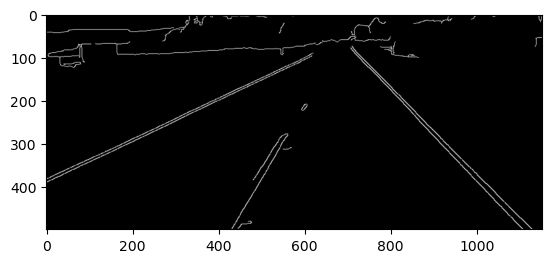

In [97]:
plt.imshow(E,cmap='gray')

In [99]:
E.max() , E.min()

(1.0, 0.0)

In [101]:
best_a, best_b = f_RANSACLine(E)
best_a, best_b

(array([0.98148148]), array([637.27777778]))

In [102]:
# drawing the line from the calculated a and b and plotting it on the image
def f_getExtents(a,b,numRows,numCols):
    r1 = int(0) # taking the first row
    c1 = int(a*r1+b)
    r2 = int(numRows-1) # taking the last colum
    c2 = int(a*r2+b)
    return (c1,r1),(c2,r2)

In [103]:
s,e = f_getExtents(best_a,best_b,E.shape[0],E.shape[1]) # starting point ending point

C:\Users\reneg\AppData\Local\Temp\ipykernel_7544\2326858065.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c1 = int(a*r1+b)
C:\Users\reneg\AppData\Local\Temp\ipykernel_7544\2326858065.py:6: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  c2 = int(a*r2+b)


In [104]:
s,e

((637, 0), (1126, 498))

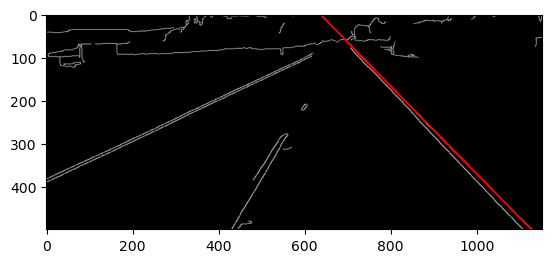

In [105]:
E2 = np.zeros((E.shape[0],E.shape[1],3),dtype=np.uint8) # number of rows as the number of rows in E, same with colums, 3 colour channels
E3 = np.array(255*E,dtype = np.uint8) # changing dtype of E to uint8
E2[:,:,0] = E3 # replacing colour channels with 255
E2[:,:,1] = E3
E2[:,:,2] = E3
I = cv2.line(E2,s,e,(0,0,255),3) # plotting line from starting point to end points, line thickness = 3
plt.imshow(I[:,:,::-1]) # reversing colour

# Detecting Circles

In [111]:
def f_fitCircle(x1,y1,x2,y2,x3,y3): # taking 3 points
    c = (x1-x2)**2 + (y1-y2)**2
    a = (x2-x3)**2 + (y2-y3)**2
    b = (x3-x1)**2 + (y3-y1)**2
    s = 2*(a*b + b*c + c*a) - (a*a + b*b + c*c) 
    px = (a*(b+c-a)*x1 + b*(c+a-b)*x2 + c*(a+b-c)*x3) / s
    py = (a*(b+c-a)*y1 + b*(c+a-b)*y2 + c*(a+b-c)*y3) / s 
    ar = a**0.5
    br = b**0.5
    cr = c**0.5 
    r = ar*br*cr / ((ar+br+cr)*(-ar+br+cr)*(ar-br+cr)*(ar+br-cr))**0.5
    return px,py,r

In [113]:
def f_getConsistencyScore_circle(r,c,th,cr,cc,d):
    score = 0
    for i in range(len(r)):
        sd = ((r[i]-cr)**2 + (c[i]-cc)**2 - d**2)**2
        if sd < th:
            score += 1
    return score

In [117]:
def f_RANSACCircle(E):
    E = E>0
    idx = np.argwhere(E)
    r , c = idx[:,0] , idx[:,1]
    best_cr , best_cc , best_d = 0 , 0 , 0
    maxScore = -1
    numIter = 2000
    for iter in range(numIter):
        r2,c2 = f_randomSample(r,c,3)
        cr,cc,d = f_fitCircle(r2[0],c2[0],r2[1],c2[1],r2[2],c2[2]) # need 3 points
        score = f_getConsistencyScore_circle(r,c,3,cr,cc,d)
        if score > maxScore:
            maxScore = score
            best_cr , best_cc , best_d = cr , cc , d
    return best_cr , best_cc , best_d

In [119]:
E = cv2.imread(r'Ec.png',cv2.IMREAD_GRAYSCALE)

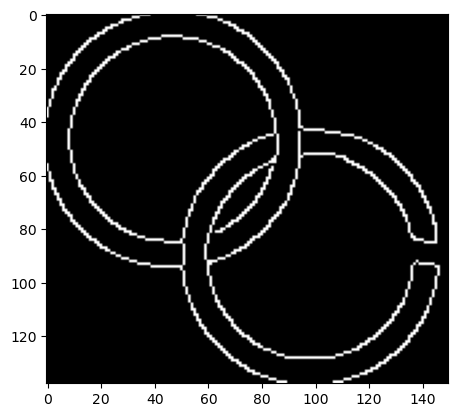

In [121]:
plt.imshow(E,cmap='gray')

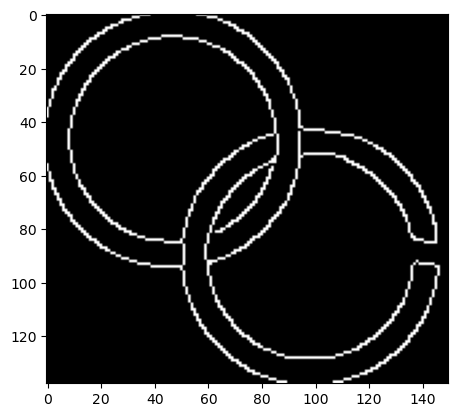

In [123]:
E = E>100 # binary
plt.imshow(E,cmap='gray')

In [125]:
best_cr,best_cc,best_d = f_RANSACCircle(E)

In [126]:
best_cr,best_cc,best_d

(46.49490909090909, 46.44763636363636, 48.170109976421024)

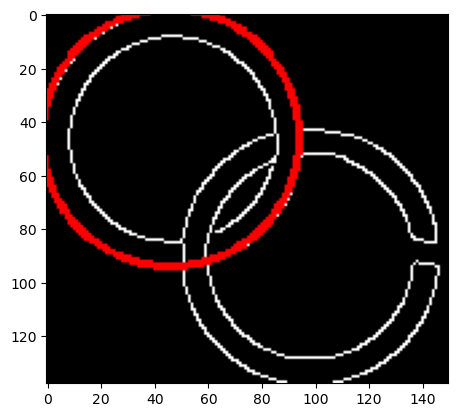

In [127]:
# drawing the resultant circle onto the image
E2 = np.zeros((E.shape[0],E.shape[1],3),dtype=np.uint8)
E3 = np.array(255*E,dtype = np.uint8)
E2[:,:,0] = E3
E2[:,:,1] = E3
E2[:,:,2] = E3
I = cv2.circle(E2,(int(best_cc),int(best_cr)),int(best_d),(0,0,255),2)
plt.imshow(I[:,:,::-1])